## Genre Classification : Pochettes d'albums avec VGG19


In [1]:
%cd /ECM/M2\IAAA/temps2/SAM/   # path containing project folder


/content/drive/MyDrive


In [2]:
import keras
import numpy as np 
import tensorflow
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, ActivityRegularization, Lambda, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D, Conv1D, MaxPooling1D
from keras.layers import AveragePooling2D, Input
from keras import backend as K 

import os
import glob
import time

import sklearn
from sklearn.preprocessing import normalize

from keras.applications.vgg19 import VGG19
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input
from keras.models import Model
from keras.utils import * 

In [3]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gc
_msdi_path = 'SAM'  # Change this to configure your path to MSDI dataset


In [4]:
def get_msdi_dataframe(msdi_path=_msdi_path):
    return pd.read_csv(Path(msdi_path) / 'msdi_mapping.csv')

def get_set(entry):
    return entry['set']

def load_img(entry, msdi_path=_msdi_path):
      img = image.load_img(Path(msdi_path) / entry['img'], target_size=(224,224))
      x = image.img_to_array(img)
      x = np.expand_dims(x, axis=0)
      x = preprocess_input(x)

      return x
def load_img(entry, msdi_path=_msdi_path):
    return plt.imread(Path(msdi_path) / entry['img'])

def get_label(entry):
    return entry['genre']


def get_label_list(msdi_path=_msdi_path):
    df = pd.read_csv(Path(msdi_path) / 'labels.csv', header=None)
    return list(df.iloc[:, 0])

In [11]:
def get_X_y(msdi_path):
    X_train = []
    y_train = []
    X_test = []
    y_test = []
    mfccs_lenghts = []
    cpt = 0
    msdi = get_msdi_dataframe(msdi_path)
    n = len(msdi)

    for idx in range(n):
        entry = msdi.loc[idx]
        cpt+=1
        if  get_set(entry) =='train' :
            x = load_img(entry, msdi_path)
            X_train.append(x)
            x=None
            y = get_label(entry)
            y_train.append(y)
            if cpt%50 ==0 :
              print(cpt)
        if  get_set(entry) =='test' :
            print(cpt)
            x = load_img(entry, msdi_path)
            X_test.append(x)
            x=None
            y = get_label(entry)
            y_test.append(y)
        gc.collect()
    print('end')
    X_train = np.asarray(X_train).astype(np.float32)
    X_test = np.asarray(X_test).astype(np.float32)
    np.save('X_train_img_run1.npy',X_train)
    np.save('y_train_img_run1.npy',y_train)
    np.save('X_test_img_run1.npy',X_test)
    np.save('y_test_img_run1.npy',y_test)
    
    # return X_train,y_train,X_test,y_test        


In [12]:
X_train,y_train,X_test,y_test= get_X_y(_msdi_path)

50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
2000
2050
2100
2150
2200
2250
2300
2350
2400
2450
2500
2550
2600
2650
2700
2750
2800
2850
2900
2950
3000
3050
3100
3150
3200
3250
3300
3350
3400
3450
3500
3550
3600
3650
3700
3750
3800
3850
3900
3950
4000
4050
4100
4150
4200
4250
4300
4350
4400
4450
4500
4550
4600
4650
4700
4750
4800
4850
4900
4950
5000
5050
5100
5150
5200
5250
5300
5350
5400
5450
5500
5550
5600
5650
5700
5750
5800
5850
5900
5950
6000
6050
6100
6150
6200
6250
6300
6350
6400
6450
6500
6550
6600
6650
6700
6750
6800
6850
6900
6950
7000
7050
7100
7150
7200
7250
7300
7350
7400
7450
7500
7550
7600
7650
7679
7680
7681
7682
7683
7684
7685
7686
7687
7688
7689
7690
7691
7692
7693
7694
7695
7696
7697
7698
7699
7700
7701
7702
7703
7704
7705
7706
7707
7708
7709
7710
7711
7712
7713
7714
7715
7716
7717
7718
7719
7720
7721
7722
7723
7724
7725
7726
7727
7728
7729


TypeError: ignored

In [ ]:
_msdi_path = '. /'  # Change this to configure your path to MSDI dataset


In [ ]:
np.save('X_train_img_run1.npy',X_train)
np.save('y_train_img_run1.npy',y_train)
np.save('X_test_img_run1.npy',X_test)
np.save('y_test_img_run1.npy',y_test)

In [7]:
X_train = np.asarray(X_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)


In [8]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder = LabelEncoder()

y_train = labelencoder.fit_transform(y_train)
y_test = labelencoder.fit_transform(y_test)

In [9]:
y_train = np.asarray(y_train).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

In [10]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)


In [11]:
n_classes = len(np.unique(y_train))
n_classes

15

In [12]:
input_shape = (X_train.shape[1],X_train.shape[2],X_train.shape[3])
input_shape


(200, 200, 3)

In [15]:

network = VGG19(include_top=False,weights='imagenet', input_shape=input_shape)
network2 = Model(inputs=network.input, outputs=network.get_layer('block4_pool').output)
network2.trainable = False


x = Input(shape=(12,12,512), name='input')
y0 = AveragePooling2D((14,14), padding='same')(x)# MaxPooling2D   AveragePooling2D ##### You may also use GlobalAveragePooling layers

y0 = Lambda(lambda x: K.l2_normalize(x, axis=-1))(y0)
y0 = Flatten()(y0)

y1=Dense(n_classes, activation='softmax')(y0)
model1 = Model(inputs=x,outputs=y1)

#Combine the networks
modelf = Model(inputs=network2.input, outputs=model1(network2.output))
modelf.compile(loss='sparse_categorical_crossentropy', optimizer='sgd')

print(modelf.summary())



Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0   

In [17]:
history = modelf.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=16, verbose=1)

Epoch 1/30
75/75 [==============================] - 7s 96ms/step - loss: 2.4362 - val_loss: 2.3852
Epoch 2/30
75/75 [==============================] - 7s 95ms/step - loss: 2.3045 - val_loss: 2.2849
Epoch 3/30
75/75 [==============================] - 6s 81ms/step - loss: 2.2147 - val_loss: 2.2208
Epoch 4/30
75/75 [==============================] - 6s 81ms/step - loss: 2.1576 - val_loss: 2.1821
Epoch 5/30
75/75 [==============================] - 6s 81ms/step - loss: 2.1223 - val_loss: 2.1592
Epoch 6/30
75/75 [==============================] - 7s 96ms/step - loss: 2.1006 - val_loss: 2.1452
Epoch 7/30
75/75 [==============================] - 7s 96ms/step - loss: 2.0864 - val_loss: 2.1361
Epoch 8/30
75/75 [==============================] - 6s 85ms/step - loss: 2.0766 - val_loss: 2.1296
Epoch 9/30
75/75 [==============================] - 7s 95ms/step - loss: 2.0693 - val_loss: 2.1245
Epoch 10/30
75/75 [==============================] - 6s 81ms/step - loss: 2.0635 - val_loss: 2.1204
Epoch 11/

In [ ]:
modelf.save('classif_img')

In [23]:
import matplotlib.pyplot as plt

def plot_loss(fit_history,title):
  plt.plot(fit_history.history['loss'])
  plt.plot(fit_history.history['val_loss'])
  plt.title(title)
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train_loss', 'val_loss'], loc='upper left')
  plt.show()

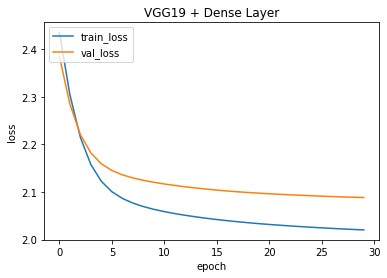

In [24]:
plot_loss(history,'VGG19 + Dense Layer')

In [19]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
def evaluate_model(model, X_test, y_test):
    """
    evaluate a model using different metrics for multiclass classification
    :param model: model to be evaluated
    :param X_test: test data
    :param y_test: test labels
    :return: a table of different metrics for multiclass classification
    """
    # predict classes
    y_pred = model.predict(X_test)

    y_pred=np.argmax(y_pred,axis=1)
    # calculate precision score
    precision = precision_score(y_test, y_pred, average='micro')
    # calculate recall score
    recall = recall_score(y_test, y_pred, average='micro')
    # calculate f1 score
    f1 = f1_score(y_test, y_pred, average='micro')
    # calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    # create a dictionary of metrics
    metrics = {'precision': precision, 'recall': recall, 'f1': f1, 'accuracy': accuracy}
    # create a dataframe of metrics
    df = pd.DataFrame(metrics, index=[0])
    # return the dataframe
    return df


In [25]:
evaluate_model(modelf, X_test, y_test)

In [ ]:
#Extract features from network2 : VGG truncated
## not done 

from keras.preprocessing.image import ImageDataGenerator
def save_bottlebeck_features(train,train_labels,test,test_labels):
    datagen = ImageDataGenerator()
    generator = datagen.flow(train,train_labels, batch_size=32,shuffle=False)
    bottleneck_features_train = network2.predict(generator,verbose=1)
    np.save(open('bottleneck_features_train2.npy', 'wb'), bottleneck_features_train)
    print("bottleneck_train.npy is created..")
    
    generator = datagen.flow(test,test_labels, batch_size=32,shuffle=False)
    bottleneck_features_validation = network2.predict_generator(generator,verbose=1)
    np.save(open('bottleneck_features_validation2.npy', 'wb'), bottleneck_features_validation)
    print("bottleneck_validation.npy is created..")
  

save_bottlebeck_features(X_train, y_train, X_test, y_test)